## Import Libraries

In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Load the data

In [4]:
df = pd.read_csv('netflix_customer_survey.csv')
df

,customerid,NumberAccounts,price,ExtraContent,ads,selected
0,7,2,10,HBO,one_per_day,1
1,7,6,8,Marvel,one_per_show,1
2,7,4,15,Disney,one_per_day,1
3,7,5,10,HBO,one_per_day,1
4,7,1,20,Soccer,one_per_show,1
...,...,...,...,...,...,...
2995,900,1,15,Marvel,one_per_day,1
2996,900,2,10,HBO,none,0
2997,900,5,8,Soccer,one_per_show,0
2998,900,2,8,Marvel,one_per_day,0


## Data Processing

In [9]:
# Isolate X and Y
Y = df['selected']
X = df.drop(columns = ['selected', 'customerid'])
X.head(2)

,NumberAccounts,price,ExtraContent,ads
0,2,10,HBO,one_per_day
1,6,8,Marvel,one_per_show


## Create dummy variables

In [11]:
x_dummy = pd.get_dummies(X, columns = X.columns)
x_dummy.head()

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,price_20,ExtraContent_Disney,ExtraContent_HBO,ExtraContent_Marvel,ExtraContent_Prime originals,ExtraContent_Soccer,ExtraContent_less content,ads_none,ads_one_per_day,ads_one_per_show
0,False,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
3,False,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True


## Regression Model

In [16]:
# Build regression model
model = sm.GLM(Y,
              x_dummy,
              family = sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               selected   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2982
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1948.3
Date:                Tue, 21 May 2024   Deviance:                       3896.6
Time:                        10:20:54   Pearson chi2:                 3.00e+03
No. Iterations:                   100   Pseudo R-squ. (CS):            0.08371
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
NumberAccounts_1                -0.7043      0.090     -7.832      0.000      -0.881      -0.528
NumberAccounts_2                -0.0732      0.088     -0.832      0.406      -0.246       0.099
NumberAccounts_3                -0.0221      0.087     -0.253      0.800      -0.193       0.149
NumberAccounts_4                 0.1253      0.083      1.504      0.133      -0.038       0.289
NumberAccounts_5                 0.1317      0.084      1.564      0.118      -0.033       0.297
NumberAccounts_6                 0.4973      0.083      6.011      0.000       0.335       0.659
price_8                          0.2970      0.085      3.497      0.000       0.131       0.463
price_10                         0.2203      0.087      2.538      0.011       0.050       0.390
price_12                         0.2019      0.082      2.451      0.014       0.040       0.363
price_15                         0.0198      0.084      0.236      0.814      -0.145       0.185
price_18                        -0.1030      0.087     -1.185      0.236      -0.273       0.067
price_20                        -0.6815      0.090     -7.567      0.000      -0.858      -0.505
ExtraContent_Disney              0.2281      0.088      2.604      0.009       0.056       0.400
ExtraContent_HBO                 0.2267      0.085      2.675      0.007       0.061       0.393
ExtraContent_Marvel              0.1452      0.084      1.725      0.084      -0.020       0.310
ExtraContent_Prime originals     0.1278      0.086      1.480      0.139      -0.042       0.297
ExtraContent_Soccer             -0.2047      0.085     -2.409      0.016      -0.371      -0.038
ExtraContent_less content       -0.5684      0.087     -6.533      0.000      -0.739      -0.398
ads_none                         0.2080      0.055      3.754      0.000       0.099       0.317
ads_one_per_day                  0.1090      0.056      1.935      0.053      -0.001       0.219
ads_one_per_show                -0.3624      0.057     -6.388      0.000      -0.474      -0.251
================================================================================================
"""

## Conjoint Analysis

In [18]:
# Create dataframe with results
df_result = pd.DataFrame({'param_name': model.params.keys(),
                         'partworth': model.params.values,
                         'pval': model.pvalues})
df_result

,param_name,partworth,pval
NumberAccounts_1,NumberAccounts_1,-0.704349,4.801517e-15
NumberAccounts_2,NumberAccounts_2,-0.073222,4.055067e-01
NumberAccounts_3,NumberAccounts_3,-0.022098,8.003958e-01
NumberAccounts_4,NumberAccounts_4,0.125260,1.326272e-01
NumberAccounts_5,NumberAccounts_5,0.131700,1.178162e-01
NumberAccounts_6,NumberAccounts_6,0.497323,1.846354e-09
price_8,price_8,0.297003,4.708048e-04
price_10,price_10,0.220336,1.113465e-02
price_12,price_12,0.201950,1.426045e-02
price_15,price_15,0.019817,8.137808e-01


In [23]:
# Identifying the significant variables
df_result['is_significant'] = (df_result['pval'] < 0.05)
df_result['color'] = ['blue' if x else 'red' for x in df_result['is_significant']]
df_result.head()

,param_name,partworth,pval,is_significant,color
NumberAccounts_1,NumberAccounts_1,-0.704349,4.801517e-15,True,blue
NumberAccounts_2,NumberAccounts_2,-0.073222,4.055067e-01,False,red
NumberAccounts_3,NumberAccounts_3,-0.022098,8.003958e-01,False,red
NumberAccounts_4,NumberAccounts_4,0.125260,1.326272e-01,False,red
NumberAccounts_5,NumberAccounts_5,0.131700,1.178162e-01,False,red


In [27]:
# Sort Values
df_result = df_result.sort_values(by = 'partworth', ascending = True)

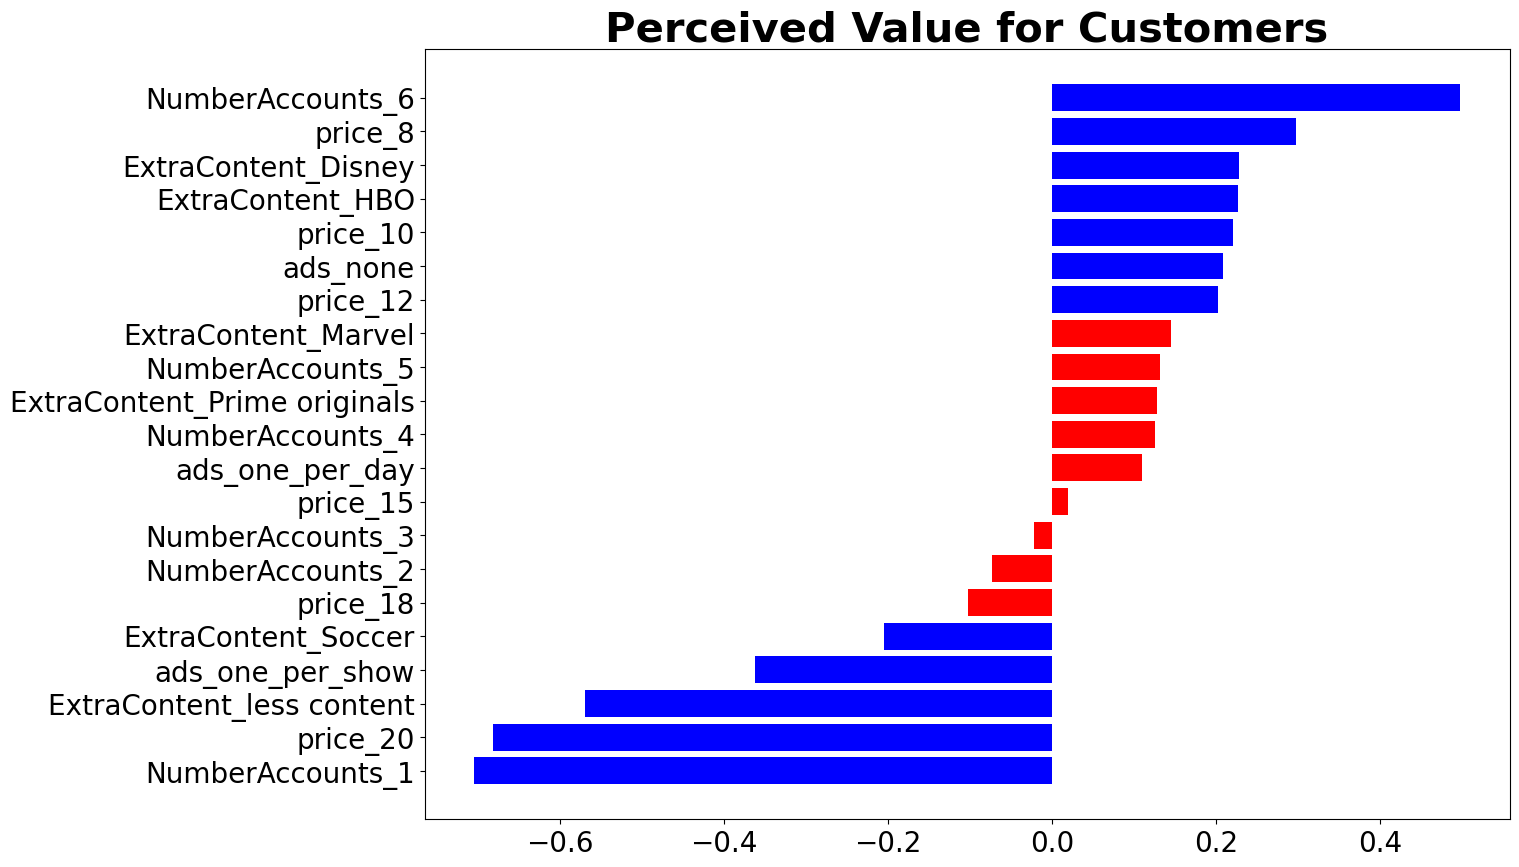

In [34]:
# Plot the Partworth
f, ax = plt.subplots(figsize = (14,10))
values = df_result['partworth']
xbar = np.arange(len(values))
plt.title('Perceived Value for Customers', fontsize = 30, fontweight = 'bold')

#Bar Plot
plt.barh(xbar,
        values,
        color = df_result['color'])

#Customizing the ticks
plt.yticks(xbar,
          labels = df_result['param_name'],
          fontsize = 20)
plt.xticks(fontsize = 20)
plt.show()

## Specific groups of Features

In [35]:
# Isolate feature groups
feature = 'price'
attributes = []
coefficients = []
for i in range(len(df_result)):
    if df_result.iloc[i,0].find(feature) == 0:
        attributes.append(df_result.iloc[i,0])
        coefficients.append(df_result.iloc[i,1])

## Lollipop Chart

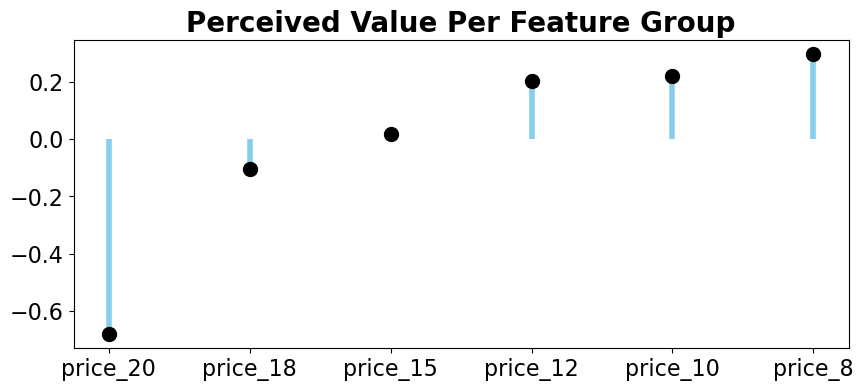

In [43]:
# Plot the Partworth
f, ax = plt.subplots(figsize = (10,4))
plt.title('Perceived Value Per Feature Group', fontsize = 20, fontweight = 'bold')

#Lollipop plot
(markers, stemlines, baseline) = plt.stem(attributes,
                                          coefficients,
                                          linefmt = '-',
                                          markerfmt = 'o',
                                          basefmt = ' ')

#Customize the lollipop
plt.setp(stemlines,
        color = 'skyblue',
        linewidth = 4)
plt.setp(markers,
        color = 'black',
        markersize = 10)

#Customizing the ticks
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)

#plt
plt.show()